#### Задача 1
Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти доверительный интервал для оценки математического ожидания mu с надёжностью 0.95, если выборочное среднее равно 80, а объём равен 256.

#### Решение 1

In [5]:
from scipy import stats
import numpy as np
from math import sqrt

In [6]:
std = 16
mean = 80
n = 256
p = 0.95

alpha = 1 - p

t1 = stats.norm.ppf(alpha / 2)
t2 = stats.norm.ppf(1 - alpha / 2)

t1, t2

(-1.959963984540054, 1.959963984540054)

In [8]:
# Доверительный интервал
(mean + t1 * std / sqrt(n), mean + t2 * std / sqrt(n))

(78.04003601545995, 81.95996398454005)

#### Задача 2
Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:

202, 203, 199, 197, 195, 201, 200, 204, 194, 190

Известно, что их веса распределены нормально. 
1. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%? 
2. Найдите P-значение для данного теста.

#### Решение 2

In [26]:
samples = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])
mean_0 = 200
alpha=0.01

H0: mean_0 = 200

H1: mean != mean_0

In [31]:
# std не известно, используем t-статистику
def statistic(samples):
    return (samples.mean() - mean_0) / (samples.std(ddof=1) / np.sqrt(samples.shape[0]))

In [32]:
n = samples.shape[0]

# Расчет квантилей
t1 = stats.t.ppf(alpha / 2, df=n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)

t1, t2

(-3.24983554401537, 3.2498355440153697)

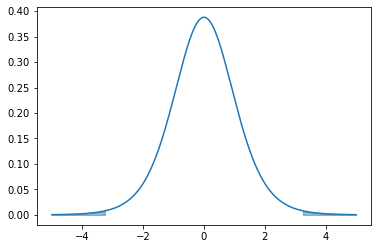

In [33]:
# Визуализация
import matplotlib.pyplot as plt

ox = np.linspace(-5, 5, 500)
oy = stats.t.pdf(ox, df=n - 1)

ox_left = np.linspace(-5, t1, 100)
oy_left = stats.t.pdf(ox_left, df=n - 1)

ox_right = np.linspace(t2, 5, 100)
oy_right = stats.t.pdf(ox_right, df=n - 1)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

In [34]:
# Статистический тест
t = statistic(samples)
t

-1.0651074037450896

Значение статистики не попало в критическую область, значит, гипотеза остаётся в силе. Следовательно утверждение продавца о том, что средний вес пачки печенья составляет 200 г - не опровергается.

P-значение для данного теста:

In [35]:
p_left = stats.t.cdf(t, df=n - 1)
p_right = 1 - stats.t.cdf(t, df=n - 1)
p_value = 2 * min(p_left, p_right)
p_value

0.31456660352472854

#### Задача 3
Утверждается, что шарики для подшипников, изготовленные автоматическим станком, имеют средний диаметр 17 мм. Используя уровень значимости 0.025 и правостороннюю критическую область, проверить данную гипотезу при условии, что в выборке из 100 шариков средний диаметр оказался равным 17.5 мм, а дисперсия известна и равна 4 мм.

#### Решение 3

In [37]:
mean_0 = 17
alpha = 0.025
# t2
n = 100
mean_samples = 17.5
std = sqrt(4)

In [41]:
# Дисперсия известна, используем z-статистику
def statistic():
    return (mean_samples - mean_0) / (std / sqrt(n))

In [40]:
t2 = stats.norm.ppf(1 - alpha) # Судя по методичке, для ПКО alpha делить на 2 не следует.
t2

1.959963984540054

In [42]:
z = statistic()
z

2.5

In [43]:
z > t2

True

z попадает в правую критическую область, следовательно H0 отвергается. Утверждение неверно.

#### Задача 4 (Дополнительно)
Дана выборка диаметров подшипников из примера 1 с занятия 5:

samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02 ]

Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, что дисперсия случайной величины равна 0.0625 при уровне значимости alpha = 0.05. Что для этого нужно знать:
1. Альтернативная гипотеза двухсторонняя.
2. Статистика для теста: H = (n - 1) * sample_variance / variance, где n - число элементов в выборке, sample_variance - несмещённая оценка дисперсии, variance - утверждаемая нулевой гипотезой дисперсия.
3. Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром df = n - 1. Её квантили можно найти с помощью функции scipy.stats.chi2.ppf.

#### Решение 4

In [52]:
samples = np.array([0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134, 1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372, 0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02])
# нормальное распределение
variance = 0.0625
alpha = 0.05
n = len(samples)
sample_variance = samples.var(ddof=n-1)
sample_variance

1.7950338595833337

In [62]:
def statistic():
    return (n - 1) * sample_variance / variance

In [54]:
# Расчет квантилей
t1 = stats.chi2.ppf(alpha / 2, df=n - 1)
t2 = stats.chi2.ppf(1 - alpha / 2, df=n - 1)
t1, t2

(11.688551922452438, 38.0756272503558)

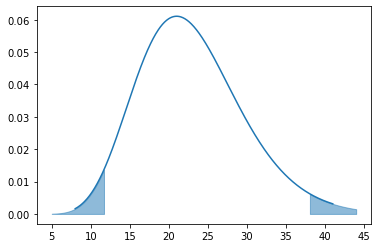

In [60]:
# Визуализация
import matplotlib.pyplot as plt

ox = np.linspace(8, 41, 500)
oy = stats.chi2.pdf(ox, df=n - 1)

ox_left = np.linspace(5, t1, 100)
oy_left = stats.chi2.pdf(ox_left, df=n - 1)

ox_right = np.linspace(t2, 44, 100)
oy_right = stats.chi2.pdf(ox_right, df=n - 1)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

In [63]:
h = statistic()
h

660.5724603266668

Значение статистики попало в правую критическую область, гипотеза неверна. Это видно даже до теста, дисперсия на выборке в разы отличается от дисперсии случайной величины.